# PROJECT RUBRIC

# Wrangle and Analyze Data

# Table of Content

##    [Gathering Data](#Gatdata)

##   [Assessing Data](#AssesData)
    
   ###   [Quality Issue](#QualityIssue)
   
   ###   [Tidiness Issue](#Tidinessissue)
        
##   [Cleaning Data](#cleandata)
     
##  [Data Storing](#storedata)

##   [Insights and Visualisations](#Insightsandvis)
 
 

In [1]:

# import all 
import pandas as pd
import numpy as np
%matplotlib inline
import requests
import json
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import tweepy
from timeit import default_timer as timer 
from functools import reduce
import re
from datetime import datetime


##  [Gathering Data](#Gatdata)
Gathering data is the first stage in data analysis as it is important to get all data ready before the assessing and cleaning stages which will be handled below.

In [2]:
#read we rate dog
tw_df = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
url =" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [4]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [5]:
with open (os.path.join(url.split("/")[-1]), mode = "wb") as file:
    file.write(response.content)
    

In [6]:
df_list =[]
with open("tweet_json.txt", "r") as tweet_data:
    for line in tweet_data:
        data = json.loads(line)
        tweet_id = data["id"]
        created_at = data["created_at"]
        favorite_count = data["favorite_count"]
        retweet_count = data["retweet_count"]
        df_list.append({"tweet_id": tweet_id,
                       "date_created": created_at,
                       "favorite_count": favorite_count,
                       "retweet_count":retweet_count})
Api_df = pd.DataFrame(df_list, columns = ["tweet_id", "date_created", "favorite_count", "retweet_count"])

##  [Assessing Data](#AssesData)

###  After gathering all three pieces of data, the next goal here is to   visually and programmatically assess for quality and tidiness in the data set.
### Nine(10) quality issues and three(3) tidiness issues will be assessed

In [7]:
# View the tw_df dataframe
display(tw_df.head(10))
display(tw_df.describe())
display(tw_df.info())
display(tw_df.value_counts())


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   
6  890971913173991426                    NaN                  NaN   
7  890729181411237888                    NaN                  NaN   
8  890609185150312448                    NaN                  NaN   
9  890240255349198849                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   
6  2017-07-28 16:27:12 +0000   
7  2017-07-28 00:22:40 +0000   
8  2017-07-27 16:25:51 +0000   
9  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   
5  Here we have a majestic great white breaching ...                  NaN   
6  Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7  When you watch your owner call another dog a g...                  NaN   
8  This is Zoey. She doesn't want to be one of th...                  NaN   
9  This is Cassie. She is a college pup. Studying...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
5                       NaN                        NaN   
6                       NaN                        NaN   
7                       NaN                        NaN   
8                       NaN                        NaN   
9                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...    

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None

Series([], dtype: int64)

In [8]:
# To assess the image prediction dataframe, the tsv file must be converted to a csv file
im_df = pd.read_csv("image-predictions.tsv", sep = "\t")
# view the im_df dataframe
display(im_df.head(10))
display(im_df.describe())
display(im_df.info())


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None

In [9]:
#view the Api_df
display(Api_df.sample(10))
display(Api_df.describe())
display(Api_df.info())


tweet_id                    date_created  favorite_count  \
227   846505985330044928  Mon Mar 27 23:35:28 +0000 2017           13046   
1580  685169283572338688  Thu Jan 07 18:41:01 +0000 2016            3778   
2049  670797304698376195  Sun Nov 29 02:51:54 +0000 2015             657   
1439  693629975228977152  Sun Jan 31 03:00:47 +0000 2016            2257   
1005  743980027717509120  Sat Jun 18 01:33:55 +0000 2016            3885   
714   780496263422808064  Mon Sep 26 19:56:24 +0000 2016               0   
1462  692187005137076224  Wed Jan 27 03:26:56 +0000 2016            2332   
1194  713411074226274305  Fri Mar 25 17:03:49 +0000 2016            4092   
1425  694905863685980160  Wed Feb 03 15:30:43 +0000 2016            2532   
2196  668171859951755264  Sat Nov 21 20:59:20 +0000 2015             424   

      retweet_count  
227            2754  
1580           1272  
2049            202  
1439            719  
1005           1000  
714            3410  
1462            744  
1194           1184  
1425            834  
2196            161

tweet_id  favorite_count  retweet_count
count  2.317000e+03     2317.000000    2317.000000
mean   7.415582e+17     7017.007769    2458.067760
std    6.812022e+16    10933.573458    4171.411767
min    6.660209e+17        0.000000       1.000000
25%    6.780211e+17     1217.000000     491.000000
50%    7.174289e+17     3035.000000    1140.000000
75%    7.985769e+17     8543.000000    2841.000000
max    8.924206e+17   144305.000000   70360.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2317 non-null   int64 
 1   date_created    2317 non-null   object
 2   favorite_count  2317 non-null   int64 
 3   retweet_count   2317 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.5+ KB


None

In [10]:
# Check for duplicate values in all three dataframes
display(sum(tw_df.duplicated()))
display(sum(im_df.duplicated()))
display(sum(Api_df.duplicated()))

0

0

0

###  [Quality Issue](#QualityIssue)
### The quality issues for the tw_df include:
Virtually assessing the data:
1. Null values in the in_reply_to_status_id, in_reply_to_user_id instead, retweeted_status_id, retweeted_status_user_id e.t.c
2. Invalid names of the dogs in the name column ranging from a, none, the e.tic.
2. The time stamp should be in date time format for easy readability
Programmatically assessing the data:
4. There are 78 rows in_reply_to_status_id and in_reply_to_user_id instead of 2356. WE will be dropping these columns as we are only interested in original tweet.
5. There are 181 rows for the retweeted_status_id, retweeted_status_user_id  and  retweeted_status_timestamp instead of 2356. We will be dropping this columns as we are only interested in the original tweets.
6. The expanded url is made up of 2297 instead of 2356 observations.that is, it is missing 59 observations.
### The quality issues of the im_df include:
Virtually assessing the dataframe:
7. Values in p1, p2, p3 sometimes start with uppercase and lowercase characters

8. Change column headers p1,p2,p3 e.t.c to be more descriptive

Programmatically assessing the dataframe:

9. The im_df is missing 281 observations present in the tw_df dataframe(i.e 2075 instead of 2356)

### The quality issues of the Api_df include:
Programmatically assessing the dataframe:

10. The im_df is missing 29 observations present in the tw_df dataframe(i.e 2317 instead of 2356)



### [Tidiness Issue](#Tidinessissue)
        
### The tidiness issue of the tw_df include:
1. All dog stages(i.e doggo, floofer,pupper,puppo) should be collapsed into 1 column


### Tidiness issue partaining to all columns
2. All 3 dataframes(tw_df,im_df,Api_df) should be merged into a single dataframe

##  [Cleaning Data](#cleandata)

## The aim of this stage is to clean data succesfully and make sure all the quality issues and tidiness issues listed above have been thoroughly corrected.

### A copy of the available data frame will be made.
### There are three different dataframes, thus three copies will be made: 
### They include copy of the twitter_enhanced.csv(tw_df), Image_predictions.tsv(to be converted to csv file:im_df) and the Api_df


### Define
create a copy of tw_df, im_df and Api_df

### Code

In [11]:
tw_dfcopy = tw_df.copy(deep= True)
im_dfcopy = im_df.copy(deep= True)
Api_dfcopy = Api_df.copy(deep = True)

### Test

In [12]:
# View 10 rows of the dataframe
# View the details of dataframe using df.info
display(tw_dfcopy.tail())
display(Api_df.tail())
display(Api_dfcopy.tail())


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

tweet_id                    date_created  favorite_count  \
2312  666049248165822465  Mon Nov 16 00:24:50 +0000 2015              88   
2313  666044226329800704  Mon Nov 16 00:04:52 +0000 2015             246   
2314  666033412701032449  Sun Nov 15 23:21:54 +0000 2015             100   
2315  666029285002620928  Sun Nov 15 23:05:30 +0000 2015             112   
2316  666020888022790149  Sun Nov 15 22:32:08 +0000 2015            2285   

      retweet_count  
2312             36  
2313            115  
2314             36  
2315             39  
2316            420

tweet_id                    date_created  favorite_count  \
2312  666049248165822465  Mon Nov 16 00:24:50 +0000 2015              88   
2313  666044226329800704  Mon Nov 16 00:04:52 +0000 2015             246   
2314  666033412701032449  Sun Nov 15 23:21:54 +0000 2015             100   
2315  666029285002620928  Sun Nov 15 23:05:30 +0000 2015             112   
2316  666020888022790149  Sun Nov 15 22:32:08 +0000 2015            2285   

      retweet_count  
2312             36  
2313            115  
2314             36  
2315             39  
2316            420

# Missing Data 
### There are 78 rows  in_reply_to_status_id and in_reply_to_user_id instead of 2356
### There are 181 rows for the retweeted_status_id, retweeted_status_user_id  and  retweeted_status_timestamp instead of 2356

# One of the project specifications is to have only original dog_ratings, that is, no retweets

###  Define
**select rows that have null values in retweet related columns**

### code

In [13]:
# to remove retweet, let us select rows that have null values in retweet related columns,
tw_dfcopy=tw_dfcopy[tw_dfcopy.retweeted_status_id.isnull()]
tw_dfcopy = tw_dfcopy[tw_dfcopy.retweeted_status_user_id.isnull()]
tw_dfcopy = tw_dfcopy[tw_dfcopy.retweeted_status_timestamp.isnull()]

### Test

In [14]:
tw_dfcopy.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

### *we only have original tweets, no retweet, view retweeted_status_id,retweeted_status_user_id and  tw_dfcopy.retweeted_status_timestamp column*

In [15]:
#

# To solve all tidiness and quality issue in the dataframe, missing data must be found out in each of the dataframe
# Now that we have only original values in the data set, let us go ahead to find missing values!!!
# There are 78 rows  *in_reply_to_status_id and in_reply_to_user_id instead of 2356
# There are 181 rows for the *retweeted_status_id, retweeted_status_user_id  and  retweeted_status_timestamp instead of 2356
# Drop all 4 columns

### Code

In [16]:
tw_dfcopy= tw_dfcopy.drop(["in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"], axis=1)


### Test

In [17]:
# view the newl tw_df dataframe usind tw_dfcopy.head(), tw_dfcopy.info()
display(tw_df.head(10))
display(tw_dfcopy.info())

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   
6  890971913173991426                    NaN                  NaN   
7  890729181411237888                    NaN                  NaN   
8  890609185150312448                    NaN                  NaN   
9  890240255349198849                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   
6  2017-07-28 16:27:12 +0000   
7  2017-07-28 00:22:40 +0000   
8  2017-07-27 16:25:51 +0000   
9  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   
5  Here we have a majestic great white breaching ...                  NaN   
6  Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7  When you watch your owner call another dog a g...                  NaN   
8  This is Zoey. She doesn't want to be one of th...                  NaN   
9  This is Cassie. She is a college pup. Studying...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
5                       NaN                        NaN   
6                       NaN                        NaN   
7                       NaN                        NaN   
8                       NaN                        NaN   
9                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


None

### Define
create a copy of the im_df 

### Code

In [18]:
im_dfcopy = im_df.copy(deep = True)

### Test

In [19]:
# view 10 random rows of the above created im_df dataframe copy
im_dfcopy.sample(10)

tweet_id                                            jpg_url  \
1520  787810552592695296    https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg   
877   698342080612007937  https://pbs.twimg.com/ext_tw_video_thumb/69834...   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg   
406   673708611235921920    https://pbs.twimg.com/media/CVl-Z0dWcAAs7wr.jpg   
1489  782598640137187329    https://pbs.twimg.com/media/CtxZTtxUMAEduGo.jpg   
1290  751456908746354688  https://pbs.twimg.com/ext_tw_video_thumb/75145...   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
810   692187005137076224    https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg   
818   692901601640583168    https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg   
1650  809220051211603969    https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg   

      img_num                           p1   p1_conf  p1_dog               p2  \
1520        2                          pug  0.362835    True   French_bulldog   
877         1                        boxer  0.883048    True    Saint_Bernard   
49          1                     Airedale  0.448459    True       toy_poodle   
406         1             golden_retriever  0.936333    True   cocker_spaniel   
1489        1                     malamute  0.840871    True  Tibetan_mastiff   
1290        1             golden_retriever  0.714409    True     Afghan_hound   
2074        1                       orange  0.097049   False            bagel   
810         2               Siberian_husky  0.810592    True         malamute   
818         1  soft-coated_wheaten_terrier  0.403496    True   cocker_spaniel   
1650        1                   Pomeranian  0.819511    True          Samoyed   

       p2_conf  p2_dog                         p3   p3_conf  p3_dog  
1520  0.221864    True             English_setter  0.080418    True  
877   0.030579    True  Staffordshire_bullterrier  0.012994    True  
49    0.124030    True                      teddy  0.110183   False  
406   0.024211    True         Labrador_retriever  0.009435    True  
1489  0.140516    True                 Eskimo_dog  0.012012    True  
1290  0.066163    True                       chow  0.028413    True  
2074  0.085851   False                     banana  0.076110   False  
810   0.119745    True                 Eskimo_dog  0.029265    True  
818   0.135164    True           golden_retriever  0.088719    True  
1650  0.141241    True                   Pembroke  0.013455    True

## Quality issue: The expanded url is made up of 2297 instead of 2356 observations.that is, it is missing 59 observations.


### Define
find missing value of expanded_url

### Code

In [20]:
tw_dfcopy["expanded_urls"] ="https://twitter.com/dog_rates/status/"+ str("tweet_id")

### Test

In [21]:
tw_dfcopy["expanded_urls"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2175 entries, 0 to 2355
Series name: expanded_urls
Non-Null Count  Dtype 
--------------  ----- 
2175 non-null   object
dtypes: object(1)
memory usage: 34.0+ KB


# *Now that we have solved missing values, let us clean data for tidiness issue*

## Tidiness issue (tw_df) :All dog stages(i.e doggo, floofer,pupper,puppo) should be collapsed into 1 column

It is important to solve tidiness issue before quality issues as this gives more clarity to the dataset in question


### Define
collapse dog stages into 1 column

### Code

In [22]:
def stage(df):
    stage_names = ["doggo", "floofer", "pupper", "puppo"]
    stage_df = np.repeat("nonenone", df.shape[0])        #nonenone was used as np.repeat truncates all input larger 
    for idx, col in enumerate(df.columns):               #starter to starter length
        dog_stage = np.where(df[col].values !="None")     #this will be fixed in the code written in the cell below
        stage_df[dog_stage] = stage_names[idx]
    return stage_df
tw_dfcopy["stage"] = stage(tw_dfcopy[["doggo", "floofer","pupper", "puppo"]])
# drop duplicates
tw_dfcopy.drop(["doggo","floofer","pupper", "puppo"], axis = 1, inplace= True)


In [23]:
#fix nonenone issue
tw_dfcopy.stage.replace("nonenone", "none", inplace = True)
    

### Test

In [24]:
# Check info of tw_dfcopy to see if all duplicates have been droppped
tw_dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2175 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   stage               2175 non-null   object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


# Quality Issue:
## Invalid names of the dogs in the name column ranging from a, none, the e.t.c. in the tw_dfcopy



### code

In [25]:
#create an empty list to store matched variables
names= []
#loop through series to match patterns
for line in tw_dfcopy["text"]:
    #Check if line start with a text and succeeding character is uppercase
    if line.startswith("This is") and re.match(r"[A-Z].*", line.split()[2]):
        names.append(line.split()[2].strip(",").rstrip())
    elif line.startswith("Meet") and re.match(r"[A-Z].*", line.split()[1]):
        names.append(line.split()[1].strip(",").rstrip())
    elif line.startswith("Say hello to") and re.match(r"[A-Z].*", line.split()[3]):
        names.append(line.split()[3].strip(",").rstrip())
    elif line.startswith("His name is") and re.match(r"[A-Z].*", line.split()[3]):
        names.append(line.split()[3].strip(",").rstrip())
    elif line.startswith("Her name is") and re.match(r"[A-Z].*", line.split()[3]):
        names.append(line.split()[3].strip(",").rstrip())
    elif line.startswith("Here we have") and re.match(r"[A-Z].*", line.split()[3]):
        names.append(line.split()[3].strip(",").rstrip())
    # check if "named" is in text and succeeding character is uppercase
    elif "named" in line and re.match(r"[A-Z].*",line.split()[line.split().index("named") +1]):
        names.append(line.split()[line.split().index("named")+1].strip(",").rstrip())
    
        
        
        
                                             

### Test

In [26]:
tw_dfcopy.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                   expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/tweet_id                13   
1  https://twitter.com/dog_rates/status/tweet_id                13   
2  https://twitter.com/dog_rates/status/tweet_id                12   
3  https://twitter.com/dog_rates/status/tweet_id                13   
4  https://twitter.com/dog_rates/status/tweet_id                12   

   rating_denominator      name stage  
0                  10   Phineas  none  
1                  10     Tilly  none  
2                  10    Archie  none  
3                  10     Darla  none  
4                  10  Franklin  none

## Quality issue: Time stamp not in date-time format

### Define
**convert time stamp to date_time**

**create a seperate index for date and time**


### code

In [27]:
# convert time stamp to date_time
tw_dfcopy['timestamp'] = pd.to_datetime(tw_dfcopy['timestamp'])

In [28]:
# create a seperate index index for date and time
tw_dfcopy['date'] = [d.date() for d in tw_dfcopy['timestamp']]
tw_dfcopy['time'] = [d.time() for d in tw_dfcopy['timestamp']]


 # *Now that we have clean all quality issues of tw_dfcopy, let us clean the im_dfcopy*

## Quality issue(im_dfcopy data frame): 

## Change column headers p1,p2,p3 e.t.c to be more descriptive

In [29]:
dict = {"p1": "image_prediction1",
        "p2": "image_prediction2",
        "p3": "image_prediction3",
       "p1_conf": "image_Algorithm_confidence1",
        "p2_conf": "image_Algorithm_confidence2",
        "p3_conf": "image_Algorithm_confidence3",
       "p1_dog": "breed_of_dog1",
       "p2_dog": "breed_of_dog2",
       "p3_dog": "breed_of_dog3"}
 
# call rename () method
im_dfcopy.rename(columns=dict,
          inplace=True)

## Quality issue(im_dfcopy data frame): 
Values in p1, p2, p3  now image_prediction1, image_prediction2, image_prediction3 respectively sometimes start with uppercase and lowercase character

### Define
Change all prediction names to uppercase

### Code

In [30]:
im_dfcopy['image_prediction1'] = im_dfcopy['image_prediction1'].str.capitalize()
im_dfcopy['image_prediction2'] = im_dfcopy['image_prediction2'].str.capitalize()
im_dfcopy['image_prediction3'] =im_dfcopy['image_prediction3'].str.capitalize()


### Test

In [31]:
# call the .info to view the im_dfcopy coluwn
im_dfcopy.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num       image_prediction1  image_Algorithm_confidence1  \
0        1  Welsh_springer_spaniel                     0.465074   
1        1                 Redbone                     0.506826   
2        1         German_shepherd                     0.596461   
3        1     Rhodesian_ridgeback                     0.408143   
4        1      Miniature_pinscher                     0.560311   

   breed_of_dog1   image_prediction2  image_Algorithm_confidence2  \
0           True              Collie                     0.156665   
1           True  Miniature_pinscher                     0.074192   
2           True            Malinois                     0.138584   
3           True             Redbone                     0.360687   
4           True          Rottweiler                     0.243682   

   breed_of_dog2    image_prediction3  image_Algorithm_confidence3  \
0           True    Shetland_sheepdog                     0.061428   
1           True  Rhodesian_ridgeback                     0.072010   
2           True           Bloodhound                     0.116197   
3           True   Miniature_pinscher                     0.222752   
4           True             Doberman                     0.154629   

   breed_of_dog3  
0           True  
1           True  
2           True  
3           True  
4           True

### Now that we have sufficinetly cleaned the data let us change the names of the dataframes

In [32]:
# change dataframe names to:
tw_dfclean =tw_dfcopy
im_dfclean=im_dfcopy
Api_dfclean = Api_dfcopy

## Tidiness issue: 

##  All 3 dataframes(tw_df,im_df,Api_df) should be merged into a single dataframe

In [33]:
# Merge dataframes together
New_df = pd.merge(left= tw_dfclean, right = im_dfclean, on = "tweet_id", how = "left")
New_dfmerged = pd.merge(left= New_df, right = Api_dfclean, on = "tweet_id", how = "left")

In [34]:
New_dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   tweet_id                     2175 non-null   int64              
 1   timestamp                    2175 non-null   datetime64[ns, UTC]
 2   source                       2175 non-null   object             
 3   text                         2175 non-null   object             
 4   expanded_urls                2175 non-null   object             
 5   rating_numerator             2175 non-null   int64              
 6   rating_denominator           2175 non-null   int64              
 7   name                         2175 non-null   object             
 8   stage                        2175 non-null   object             
 9   date                         2175 non-null   object             
 10  time                         2175 non-null   obj

## [Data Storing](#storedata)

## Store New_dfmerged as a new csv file

### Define
Now that we have #merge all three data frames, lt us store newly created dataframe as "twitter_master_archive.csv"

### Code

In [35]:
New_dfmerged.to_csv("twitter_master_archive.csv", index= False)


### Test

In [36]:
# View the newly created CSV file
df =pd.read_csv("twitter_master_archive.csv")
df.head()


tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56+00:00   
1  892177421306343426  2017-08-01 00:17:27+00:00   
2  891815181378084864  2017-07-31 00:18:03+00:00   
3  891689557279858688  2017-07-30 15:58:51+00:00   
4  891327558926688256  2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                   expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/tweet_id                13   
1  https://twitter.com/dog_rates/status/tweet_id                13   
2  https://twitter.com/dog_rates/status/tweet_id                12   
3  https://twitter.com/dog_rates/status/tweet_id                13   
4  https://twitter.com/dog_rates/status/tweet_id                12   

   rating_denominator      name stage        date  ... breed_of_dog1  \
0                  10   Phineas  none  2017-08-01  ...         False   
1                  10     Tilly  none  2017-08-01  ...          True   
2                  10    Archie  none  2017-07-31  ...          True   
3                  10     Darla  none  2017-07-30  ...         False   
4                  10  Franklin  none  2017-07-29  ...          True   

    image_prediction2  image_Algorithm_confidence2 breed_of_dog2  \
0               Bagel                     0.085851         False   
1            Pekinese                     0.090647          True   
2            Malamute                     0.078253          True   
3  Labrador_retriever                     0.168086          True   
4    English_springer                     0.225770          True   

             image_prediction3 image_Algorithm_confidence3 breed_of_dog3  \
0                       Banana                    0.076110         False   
1                     Papillon                    0.068957          True   
2                       Kelpie                    0.031379          True   
3                      Spatula                    0.040836         False   
4  German_short-haired_pointer                    0.175219          True   

                     date_created favorite_count retweet_count  
0  Tue Aug 01 16:23:56 +0000 2017        33708.0        6973.0  
1  Tue Aug 01 00:17:27 +0000 2017        29230.0        5276.0  
2  Mon Jul 31 00:18:03 +0000 2017        21979.0        3465.0  
3  Sun Jul 30 15:58:51 +0000 2017        36803.0        7195.0  
4  Sat Jul 29 16:00:24 +0000 2017        35189.0        7721.0  

[5 rows x 25 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tweet_id                     2175 non-null   int64  
 1   timestamp                    2175 non-null   object 
 2   source                       2175 non-null   object 
 3   text                         2175 non-null   object 
 4   expanded_urls                2175 non-null   object 
 5   rating_numerator             2175 non-null   int64  
 6   rating_denominator           2175 non-null   int64  
 7   name                         2175 non-null   object 
 8   stage                        2175 non-null   object 
 9   date                         2175 non-null   object 
 10  time                         2175 non-null   object 
 11  jpg_url                      1994 non-null   object 
 12  img_num                      1994 non-null   float64
 13  image_prediction1 

## Now that we have stored the csv file, let use create insights and visualise the newly created dataframe
**After visualizing the data, certain insights were found which are:**

## [Insights and Visualisations](#Insightsandvis)
 
## 1. The dataframe had more favorite tweet than retweet in all data entries

## 2. Most of  the tweets were  within the hours of 0 and 1( that isw within 12 and 1am)

## 3.The dogs with the highest favourite tweet were in the puppo stage

## The dataframe had more favorite tweet than retweet in all data entries: 
**The plot of favorite_count to retweet_count shows that the dataframe has more favourite tweets than retweet with thin the range of 20,000 favourite to 40,000 retweet**

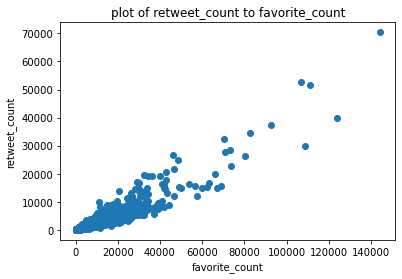

In [38]:
# plot a scatter plot of favourite tweet and retweet_count to show the relationship between favorite_count and retweet_count
plt.scatter(df["favorite_count"], df["retweet_count"])
plt.ylabel("retweet_count")
plt.xlabel("favorite_count")
plt.title("plot of retweet_count to favorite_count")
plt.show()


## Most of the tweets were tweeting within the hours of 12am and 1am:


In [39]:
# convert time to daatetime
df["time"] = pd.to_datetime(df["time"])

In [40]:
#create another column.
# this was created to closely observe the time at which people were tweeting the most
df['time_in_hours'] = df['time'].dt.hour

In [41]:
# check the time in hours with the highest occurence
df["time_in_hours"].mode()

0    1
Name: time_in_hours, dtype: int64

Text(0.5, 1.0, 'Distribution of tweeting time')

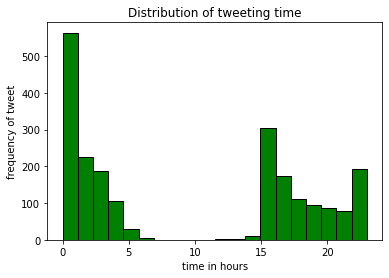

In [42]:
# plot an histogram to show the time 
plt.hist( df["time_in_hours"], bins = 20, color = "g", edgecolor = "black")
plt.xlabel("time in hours")
plt.ylabel("frequency of tweet")
plt.title("Distribution of tweeting time")

## The dogs with the highest favourite tweet were in the puppo stage

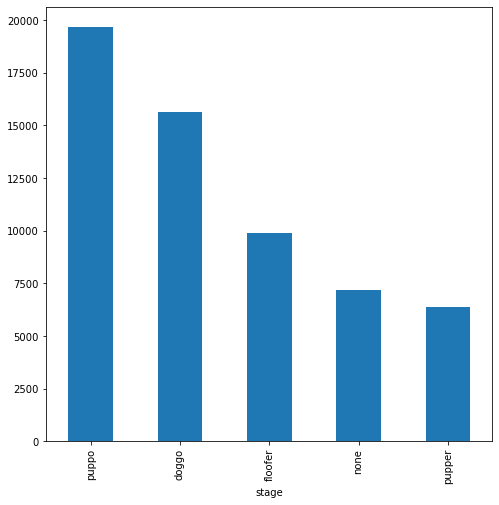

In [43]:
# groupby dogstage and plot a bar shart to show the dpg stages with the highest favorite tweet
df.groupby("stage")["favorite_count"].mean().sort_values(ascending=False).plot(kind='bar', figsize= (8,8));
